Wine Data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/red_wine_quality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,origin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Imported
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Local
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Imported
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Local
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Local


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
origin                  1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
col_list = list(df.columns)
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'origin']

In [6]:
dummy_origin = pd.get_dummies(df['origin'], prefix = 'origin', drop_first=True)
# dummy_origin = pd.get_dummies(df['origin'], prefix = 'origin', drop_first=False)

In [7]:
# dummy_origin.head()

In [8]:
n_cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'origin']
new_df = df[n_cols].join(dummy_origin.loc[:, 'origin_Local':])
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,origin,origin_Local
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Imported,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Local,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Imported,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Local,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Local,1


In [9]:
new_df = new_df.drop('origin', axis=1)

In [10]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,origin_Local
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
new_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,origin_Local
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.026492
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.015066
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,-0.013665
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.036529
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.005473
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.047401
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.021963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.039841
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.007778
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.020395


In [13]:
new_df.kurt()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
origin_Local            -2.000583
dtype: float64

In [18]:
new_df.kurt().nlargest(3)

chlorides         41.715787
residual sugar    28.617595
sulphates         11.720251
dtype: float64

In [17]:
new_df.kurt().nsmallest(3)

origin_Local   -2.000583
citric acid    -0.788998
alcohol         0.200029
dtype: float64

In [73]:
new_df.kurt().max()

41.71578724757677

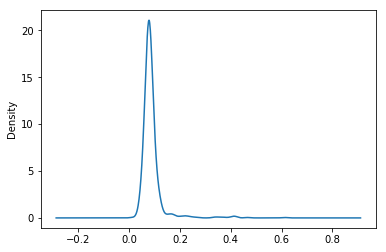

In [75]:
new_df['chlorides'].plot.density()

In [76]:
new_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
origin_Local           -0.043829
dtype: float64

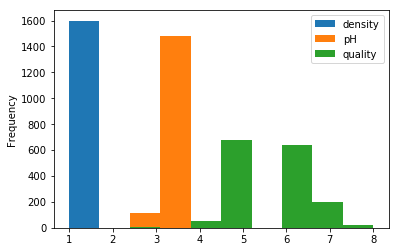

In [80]:
new_df[['density', 'pH', 'quality']].plot(kind="hist")

density       Axes(0.125,0.125;0.227941x0.755)
pH         Axes(0.398529,0.125;0.227941x0.755)
quality    Axes(0.672059,0.125;0.227941x0.755)
dtype: object

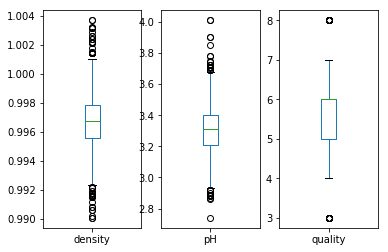

In [82]:
new_df[['density', 'pH', 'quality']].plot(kind="box", subplots=True)

In [87]:
import matplotlib.pyplot as plt


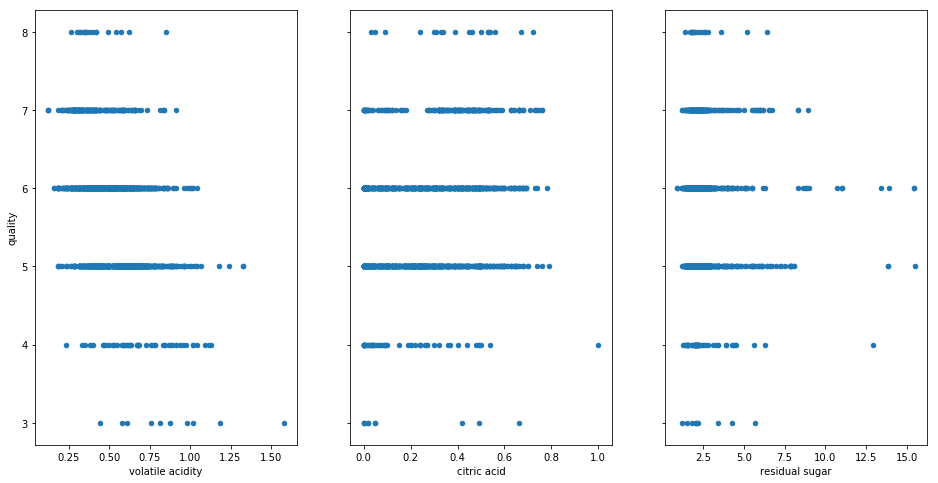

In [90]:
fig, axs = plt.subplots(1, 3, sharey=True)
new_df.plot(kind='scatter', x='volatile acidity', y='quality', ax=axs[0], figsize=(16, 8))
new_df.plot(kind='scatter', x='citric acid', y='quality', ax=axs[1])
new_df.plot(kind='scatter', x='residual sugar', y='quality', ax=axs[2])

# new_df[['volatile acidity', 'citric acid', 'residual sugar']].scatter()